In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Preparation and Analysis Report: Property_Price Dataset

## Introduction
#### The objective of this analysis was to clean and prepare the Property_Price dataset for further analysis. The initial dataset consisted of 1459 rows and 81 columns.

## Data Cleaning Process
### 1. Initial Data Shape:

#### The original dataset had a shape of (1459, 81).

## 2. Removing Unnecessary Columns:

#### The 'ID' column was removed as it did not provide any valuable information for the analysis.
#### After further analysis, the following columns were identified as unnecessary and were removed: 'Lot_Extent', 'Lane_Type', 'Brick_Veneer_Type', 'Fireplace_Quality', 'Pool_Quality', 'Fence_Quality', and 'Miscellaneous_Feature'.
#### The dataset shape after removing these columns was (1459, 73).

## 3. Handling Missing Values:

#### Missing values in the dataset were handled using appropriate imputation methods:
- Mean: Used for numerical columns.
- Mode: Used for categorical columns.
- Median: Used for columns where data distribution was skewed
- The columns with imputed values include:-
-  ["Basement_Height", "Basement_Condition", "Exposure_Level", "BsmtFinType1", "BsmtFinType2", "Electrical_System",
          "Garage", "Garage_Finish_Year", "Garage_Quality", "Garage_Condition"]

### After performing the above steps, the dataset was cleaned and ready for further analysis.
## Conclusion
- The data cleaning process involved removing unnecessary columns, handling missing values, and ensuring the dataset was in a usable format. The final shape of the cleaned dataset is (1459, 73). This cleaned dataset provides a solid foundation for subsequent analysis and modeling efforts.

# To gain a thorough understanding of our dataset, we utilized the Pandas Profiling tool for comprehensive data analysis. This tool facilitated both univariate and bivariate analyses, as well as correlation assessments.

- link of Pandas Profiling Analysis: https://drive.google.com/file/d/1zGGV5WYWxdVioV2zwHb9-hLP1aSp7ydd/view?usp=drive_link

### After completing the pandas profiling analysis, I proceeded to train and test the model using the prepared dataset. This involved splitting the data into training and testing sets, training various models, and evaluating their performance based on the testing data.

In [4]:
df_new = pd.read_csv("file_without_null_values.csv")

In [5]:
df_new.shape

(1459, 73)

In [7]:
X = df_new.iloc[:,0:-1]
y = df_new.iloc[:,-1]

In [8]:
X.head(2)

,Building_Class,Zoning_Class,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,...,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
0,60,RLD,8450,Paved,Reg,Lvl,AllPub,I,GS,CollgCr,...,69.596115,20.337934,0,0,0,0,2,2008,WD,Normal
1,20,RLD,9600,Paved,Reg,Lvl,AllPub,FR2P,GS,Veenker,...,74.716033,15.039392,0,0,0,0,5,2007,WD,Normal


In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [10]:
encoder = OneHotEncoder(sparse_output=False)
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[('num', Pipeline(steps=[('scaler', StandardScaler())]), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown="ignore"), categorical_cols)
    ])  # keep the other columns as is

df_encoded = preprocessor.fit_transform(X)

In [11]:
encoded_feature_names1 = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
encoded_feature_names2 = preprocessor.named_transformers_['num'].get_feature_names_out()
all_feature_names = list(encoded_feature_names1) + list(encoded_feature_names2)

In [12]:
len(all_feature_names)

267

In [13]:
df_encoded.shape

(1459, 267)

In [14]:
df_encoded = pd.DataFrame(df_encoded, columns=all_feature_names)

In [15]:
df_encoded

,Zoning_Class_Commer,Zoning_Class_FVR,Zoning_Class_RHD,Zoning_Class_RLD,Zoning_Class_RMD,Road_Type_Gravel,Road_Type_Paved,Property_Shape_IR1,Property_Shape_IR2,Property_Shape_IR3,...,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold
0,0.072771,-0.207111,0.650852,-0.516787,1.050507,0.877986,0.510905,0.575950,-0.287744,-0.945245,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.873090,-0.091895,-0.072372,2.179252,0.156540,-0.430226,-0.574674,1.172460,-0.287744,-0.641887,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.072771,0.073415,0.650852,-0.516787,0.984287,0.829534,0.322590,0.093479,-0.287744,-0.302307,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.309236,-0.096904,0.650852,-0.516787,-1.863163,-0.720940,-0.574674,-0.498645,-0.287744,-0.062338,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.072771,0.374980,1.374077,-0.516787,0.951177,0.732629,1.363861,0.464105,-0.287744,-0.175531,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.873090,-0.302289,0.650852,-0.516787,1.083617,0.974891,-0.574674,-0.073193,-0.287744,0.551169,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,0.072771,-0.260511,-0.072372,-0.516787,0.918068,0.732629,-0.574674,-0.972344,-0.287744,0.872638,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,-0.873090,0.266277,-0.072372,0.381893,0.222760,0.151202,0.084428,0.760166,0.723464,0.048592,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.309236,-0.147800,0.650852,3.077931,-1.002306,1.023343,-0.574674,-0.369255,-0.287744,0.700585,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
aaa = preprocessor.named_transformers_['num']["scaler"].get_feature_names_out()
aaa
len(aaa)

35

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R2 score: ", r2)
print("MSE: ", mse)

R2 score:  -6.340669423254766e+17
MSE:  3.334346388367599e+27


In [21]:
## Means the data is not linear

In [22]:
columns_to_scale = ['Lot_Size', 'Brick_Veneer_Area', 'BsmtFinSF2', "Underground_Half_Bathroom", "Kitchen_Above_Grade", 
                   "Screen_Lobby_Area", "Miscellaneous_Value"]

In [23]:
new_drop_cols = ["Month_Sold", "Year_Sold"]

In [24]:
df_new = df_new.drop(new_drop_cols, axis=1)

In [25]:
df_new.shape

(1459, 71)

In [26]:
X = df_new.iloc[:,0:-1]
y = df_new.iloc[:,-1]

In [27]:
X.shape

(1459, 70)

In [28]:
encoder = OneHotEncoder(sparse_output=False)
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[('num', Pipeline(steps=[('scaler', StandardScaler())]), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown="ignore"), categorical_cols)
    ])  # keep the other columns as is

df_encoded = preprocessor.fit_transform(X)

In [29]:
encoded_feature_names1 = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
encoded_feature_names2 = preprocessor.named_transformers_['num'].get_feature_names_out()
all_feature_names = list(encoded_feature_names1) + list(encoded_feature_names2)

In [30]:
df_encoded = pd.DataFrame(df_encoded, columns=all_feature_names)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

In [32]:
# Evaluation with xgboost

from sklearn.linear_model import LinearRegression
import xgboost as xgb

model = LinearRegression()
xgb = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

model.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
y_pred2 = xgb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred2)

r2 = r2_score(y_test, y_pred)
r22 = r2_score(y_test, y_pred2)

print("R2 score: ", r2)
print("MSE: ", mse)

print("R2 score: ", r22)
print("MSE: ", mse2)

R2 score:  -5.154654906119597e+18
MSE:  2.7106609447995225e+28
R2 score:  0.8714097120812617
MSE:  676213398.7437927


In [34]:
# accuracy with xgboost is 87.14%

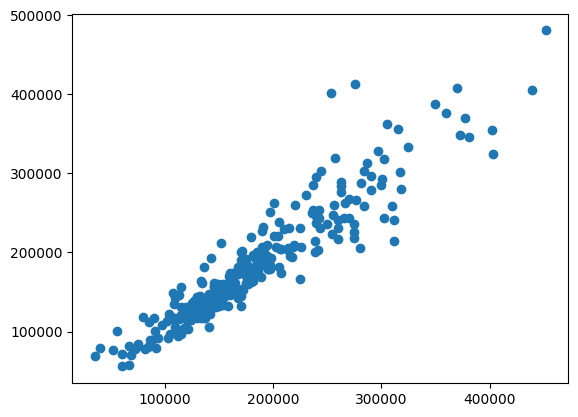

In [35]:
plt.scatter(y_test, y_pred2)

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Define models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'k-NN': KNeighborsRegressor(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Neural Network': MLPRegressor(max_iter=1000)
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R²': r2}

# Print results
for name, metrics in results.items():
    print(f'{name} - MSE: {metrics["MSE"]:.4f}, R²: {metrics["R²"]:.4f}')

C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.749e+10, tolerance: 7.671e+08



Decision Tree - MSE: 1546437316.3527, R²: 0.7059
Random Forest - MSE: 561817282.8983, R²: 0.8932
Gradient Boosting - MSE: 489784031.8279, R²: 0.9069
SVR - MSE: 5558806379.5032, R²: -0.0571
k-NN - MSE: 1125523321.1477, R²: 0.7860
Ridge - MSE: 579639488.3872, R²: 0.8898
Lasso - MSE: 579548159.6933, R²: 0.8898
ElasticNet - MSE: 578628630.1335, R²: 0.8900
Neural Network - MSE: 6304341107.6862, R²: -0.1988


C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



In [37]:
# I have checked with the various models 
# the r2 score with Gradient Boosting model is hightest of 90.6%

### Applied OneHotEncoding and Standard Scaling using a ColumnTransformer in a pipeline.
### Initially used a linear regression model, but the R² score was unsatisfactory due to the data's non-linear nature.
### Removed two columns and achieved an R² score of 87% with XGBoost.
### I further evaluated various models and found that Gradient Boosting provided the highest R² score of 91.47%, while models like SVR and Neural Networks performed poorly.

In [38]:
df = pd.read_csv("file_without_null_values.csv")

In [39]:
df.shape

(1459, 73)

# After evaluating various models, I performed Exploratory Data Analysis(EDA) on the data. 

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   int64  
 1   Zoning_Class               1459 non-null   object 
 2   Lot_Size                   1459 non-null   int64  
 3   Road_Type                  1459 non-null   object 
 4   Property_Shape             1459 non-null   object 
 5   Land_Outline               1459 non-null   object 
 6   Utility_Type               1459 non-null   object 
 7   Lot_Configuration          1459 non-null   object 
 8   Property_Slope             1459 non-null   object 
 9   Neighborhood               1459 non-null   object 
 10  Condition1                 1459 non-null   object 
 11  Condition2                 1459 non-null   object 
 12  House_Type                 1459 non-null   object 
 13  House_Design               1459 non-null   objec

In [41]:
mean_price = df['Sale_Price'].mean()
median_price = df['Sale_Price'].median()
mode_price = df['Sale_Price'].mode()[0]

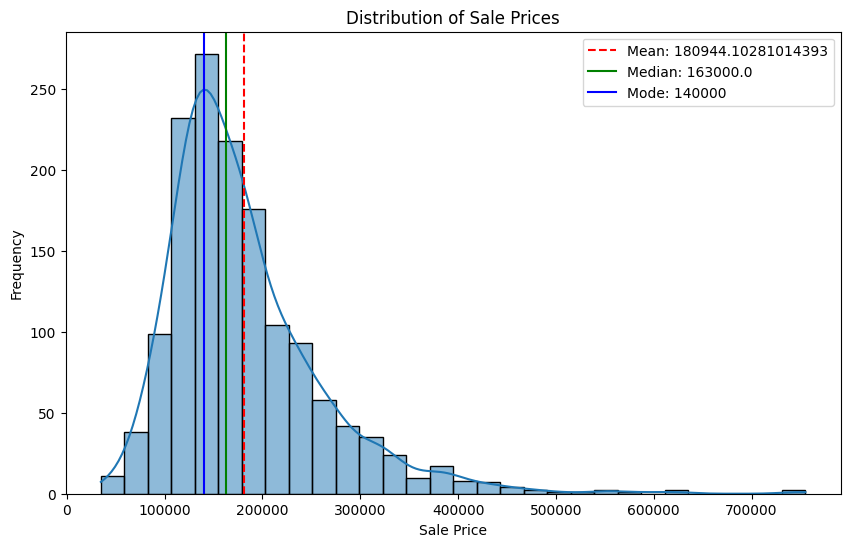

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sale_Price'], bins=30, kde=True)
plt.axvline(mean_price, color='r', linestyle='--', label=f'Mean: {mean_price}')
plt.axvline(median_price, color='g', linestyle='-', label=f'Median: {median_price}')
plt.axvline(mode_price, color='b', linestyle='-', label=f'Mode: {mode_price}')
plt.legend()
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [43]:
print(mean_price, median_price, mode_price)

180944.10281014393 163000.0 140000


# Mean (Average) Price: 180944.10

### The mean price is the average housing price.
### This measure is useful because it provides a general idea of the overall market price.
### However, it can be affected by extremely high or low prices (outliers).

# Median Price: 163000.0

### The median represents the price at which half the houses are priced higher and half are priced lower.

# Mode Price: 140000

### The mode is the most frequently occurring price in the dataset.
### This measure is useful to identify the most common price point in the market.

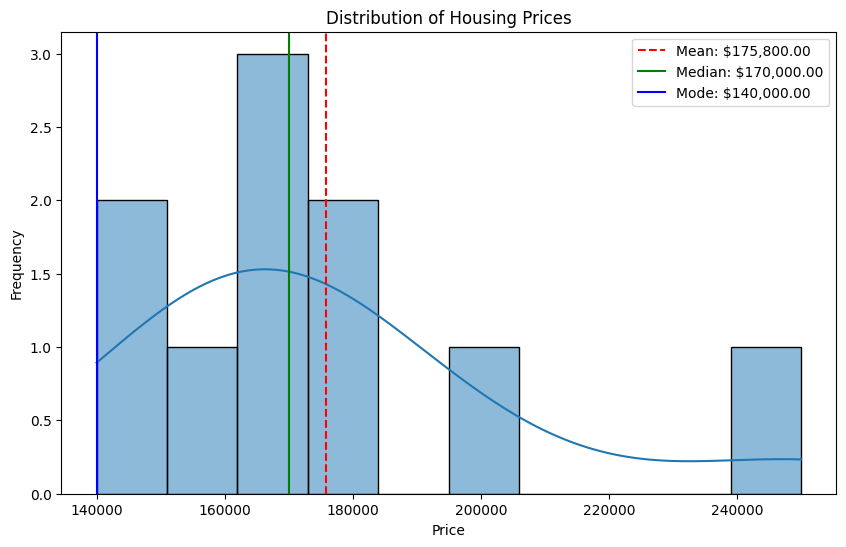

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for illustration
prices = [140000, 150000, 160000, 163000, 165000, 170000, 180000, 180000, 200000, 250000]

mean_price = sum(prices) / len(prices)
median_price = sorted(prices)[len(prices) // 2]
mode_price = 140000  

plt.figure(figsize=(10, 6))
sns.histplot(prices, bins=10, kde=True)
plt.axvline(mean_price, color='r', linestyle='--', label=f'Mean: ${mean_price:,.2f}')
plt.axvline(median_price, color='g', linestyle='-', label=f'Median: ${median_price:,.2f}')
plt.axvline(mode_price, color='b', linestyle='-', label=f'Mode: ${mode_price:,.2f}')
plt.legend()
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Above picture provides a clear and comprehensive explanation of the central tendency measures helping to understand the key aspects of the sales price data.

<Axes: xlabel='Sale_Price', ylabel='Lot_Size'>

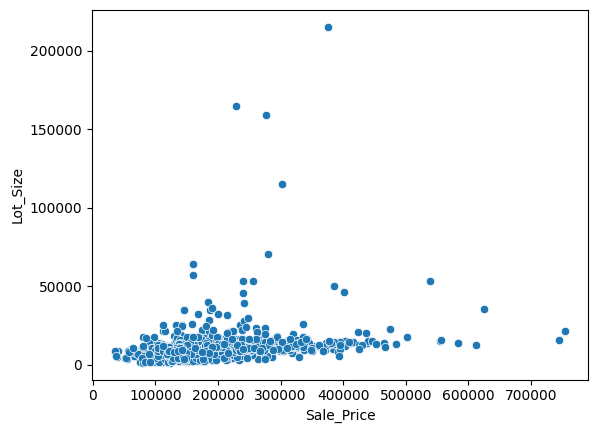

In [46]:
sns.scatterplot(data = df, y = "Lot_Size", x = "Sale_Price")

In [48]:
correlation = df['Lot_Size'].corr(df['Sale_Price'])
correlation

0.2638429115653823

In [49]:
lot_sale_df = df[["Lot_Size", "Sale_Price"]]
lot_sale_df = lot_sale_df[lot_sale_df["Lot_Size"] < 100000]
correlation = lot_sale_df['Lot_Size'].corr(lot_sale_df['Sale_Price'])
correlation

0.3545076735098013

<Axes: xlabel='Lot_Size', ylabel='Sale_Price'>

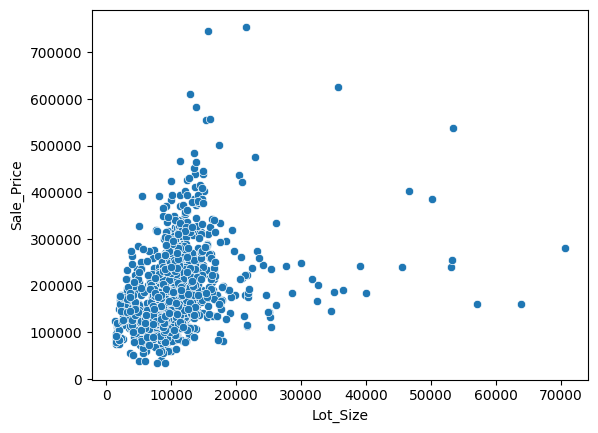

In [50]:
sns.scatterplot(data = lot_sale_df, x = "Lot_Size", y = "Sale_Price")

### larger lots sell for higher prices. But, sometimes, there are exceptions where a big lot might not sell for as much as expected or a small lot might sell for more.

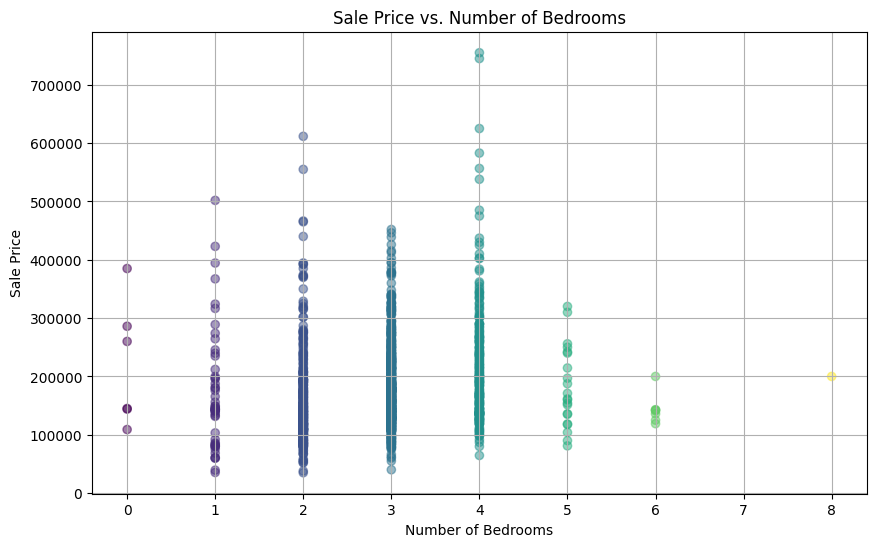

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Bedroom_Above_Grade'], df['Sale_Price'], alpha=0.5, c=df["Bedroom_Above_Grade"])
plt.title('Sale Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

#### properties with more bedrooms tend to sell for more money. However, there are also some dots that fall outside of this trend. These are called outliers. Outliers are properties that have a high or low sale price compared to other properties with a similar number of bedrooms. There could be a few reasons for this, such as the location of the property, its condition, or special features that the property has.

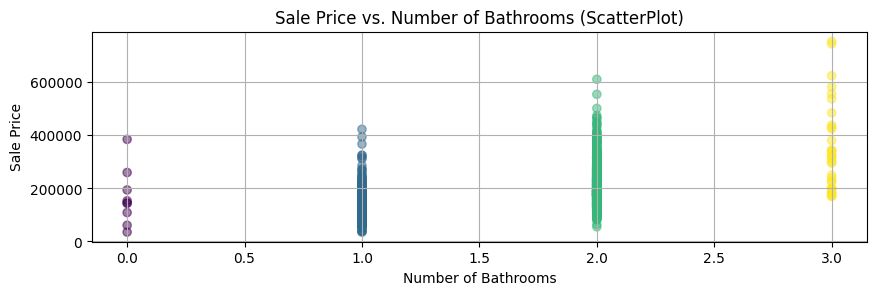

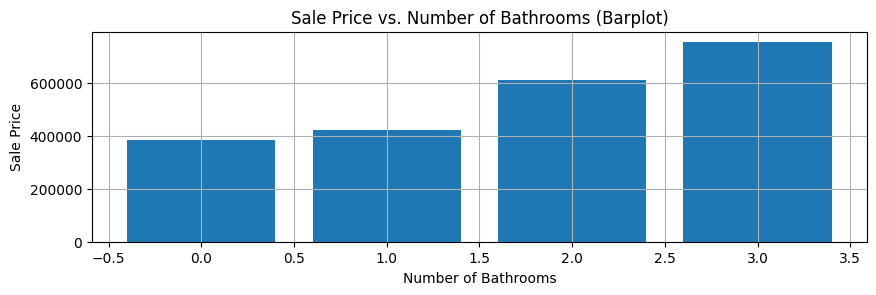

In [52]:
plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
plt.scatter(df['Full_Bathroom_Above_Grade'], df['Sale_Price'], alpha=0.5, c=df["Full_Bathroom_Above_Grade"])
plt.title('Sale Price vs. Number of Bathrooms (ScatterPlot)')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Sale Price')
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.subplot(2,1,2)
plt.bar(df['Full_Bathroom_Above_Grade'], df['Sale_Price'])
plt.title('Sale Price vs. Number of Bathrooms (Barplot)')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Sale Price')
plt.grid(True)

plt.show()

#### Properties with more bathrooms tend to sell for more money. However, there are also some dots that fall outside this trend.

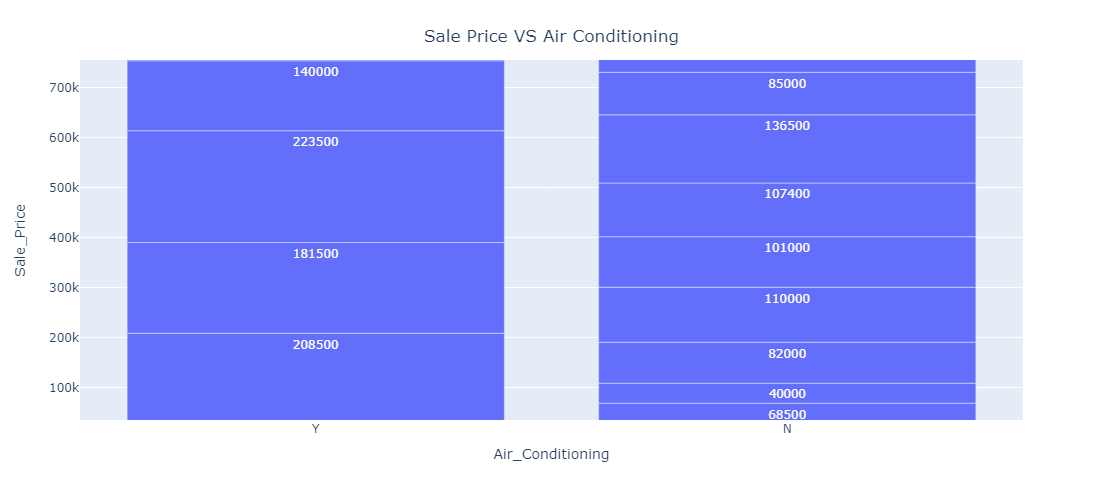

In [54]:
fig = px.bar(df, x = 'Air_Conditioning', y = 'Sale_Price' ,text="Sale_Price")
fig.update_layout(title = "Sale Price VS Air Conditioning",title_x=0.5,title_y=0.94, autosize=False, width=1000,height=500)
#fig.update_traces(marker_color = 'violet', marker_line_color = 'black',marker_line_width = 2)
y_min = df["Sale_Price"].min()
y_max = df["Sale_Price"].max()
fig.update_layout(yaxis=dict(range=[y_min, y_max]))
fig.show()

#### As property prices increase, the price difference between perperties with air conditioning and those without also grows. In other words, more expensive properties tend to show a bigger price gap based on whether they have air conditioning installed.

In [55]:
df["Sale_Price"].max()

755000

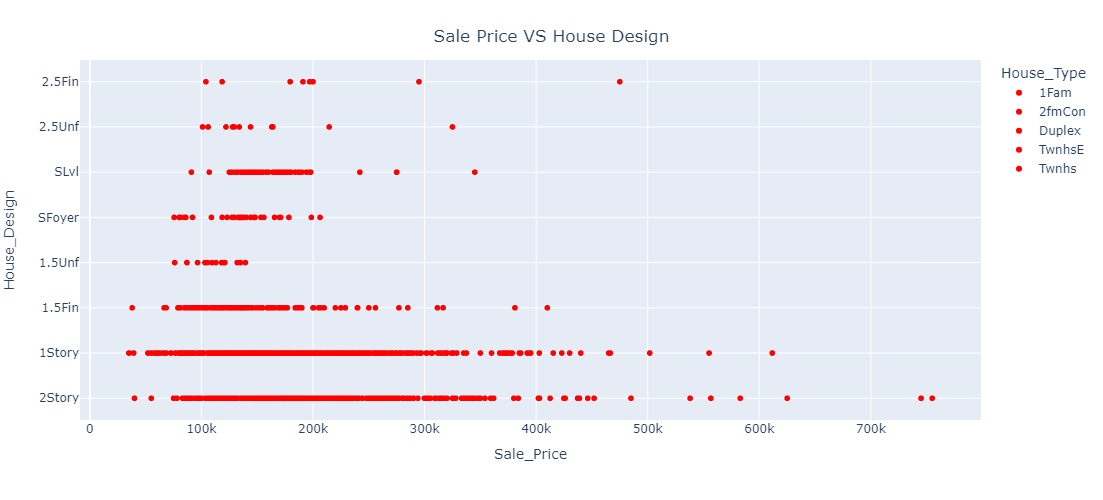

In [56]:
fig = px.scatter(df, x = "Sale_Price", y = "House_Design", color="House_Type")
fig.update_layout(title = "Sale Price VS House Design",title_x=0.5,title_y=0.94, autosize=False, width=1000,height=500)
fig.update_traces(marker_color = 'red', marker_line_color = 'black')
fig.show()

- 2.5Fin and 2.5Unf categories have very few records (only 20 each), indicating these designs are less common.
- 1Story and 2Story houses are the most common designs with a wide range of sale prices.
- 2Story houses generally command higher prices, indicating a likely positive correlation between having multiple stories and higher sale prices.
- The spread of prices in 1Story houses suggests a broad market segment with varying prices based on other factors (like size, location, etc.).

In [57]:
df.shape

(1459, 73)

## Then I performed feature selection on the data. The initial dataset had a shape of (1459, 73).

In [58]:
import scipy.stats as stats

categorical_columns = df.select_dtypes(include=['object']).columns

# Perform ANOVA for each categorical column
anova_results = {}
for col in categorical_columns:
    groups = [df[df[col] == category]['Sale_Price'] for category in df[col].unique()]
    anova_result = stats.f_oneway(*groups)
    anova_results[col] = anova_result

# Print ANOVA results
for col, result in anova_results.items():
    print(f"ANOVA result for {col}: F-statistic = {result.statistic}, p-value = {result.pvalue}")

ANOVA result for Zoning_Class: F-statistic = 43.85461265705704, p-value = 8.623678334677968e-35
ANOVA result for Road_Type: F-statistic = 2.4601325688217863, p-value = 0.11698606402169083
ANOVA result for Property_Shape: F-statistic = 40.059946792250386, p-value = 7.137696914217586e-25
ANOVA result for Land_Outline: F-statistic = 12.840259882227091, p-value = 2.7817438435761282e-08
ANOVA result for Utility_Type: F-statistic = 0.2989507717386339, p-value = 0.5846246651848929
ANOVA result for Lot_Configuration: F-statistic = 7.7952425864006205, p-value = 3.250291720935249e-06
ANOVA result for Property_Slope: F-statistic = 1.9526600191586492, p-value = 0.14226753347490803
ANOVA result for Neighborhood: F-statistic = 71.73067858473284, p-value = 2.3465866522923626e-225
ANOVA result for Condition1: F-statistic = 6.119869778841551, p-value = 8.850238347455908e-08
ANOVA result for Condition2: F-statistic = 2.073107344843178, p-value = 0.043510119433217
ANOVA result for House_Type: F-statistic

In [59]:
most_correlated_column = min(anova_results, key=anova_results.get)

In [60]:
most_correlated_column

'Utility_Type'

In [61]:
type(anova_results)

dict

In [62]:
p_values_df = pd.DataFrame(anova_results)
p_values_df = p_values_df.T
p_values_df = p_values_df.rename(columns={0:"statistic", 1:"pvalue"})

In [63]:
p_values_df

,statistic,pvalue
Zoning_Class,43.854613,8.623678e-35
Road_Type,2.460133,1.169861e-01
Property_Shape,40.059947,7.137697e-25
Land_Outline,12.840260,2.781744e-08
Utility_Type,0.298951,5.846247e-01
Lot_Configuration,7.795243,3.250292e-06
Property_Slope,1.952660,1.422675e-01
Neighborhood,71.730679,2.346587e-225
Condition1,6.119870,8.850238e-08
Condition2,2.073107,4.351012e-02


In [64]:
p_values_df[p_values_df["pvalue"] > 0.0001].index

Index(['Road_Type', 'Utility_Type', 'Property_Slope', 'Condition2',
       'BsmtFinType2', 'Heating_Type'],
      dtype='object')

In [73]:
p_cols = ['Road_Type', 'Utility_Type', 'Property_Slope', 'Condition2',
       'BsmtFinType2', 'Heating_Type']

In [74]:
numerical_columns = ['Building_Class', 'Lot_Size', 'Overall_Material', 'House_Condition',
       'Construction_Year', 'Remodel_Year', 'Brick_Veneer_Area', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade',
       'Bedroom_Above_Grade', 'Kitchen_Above_Grade', 'Rooms_Above_Grade',
       'Fireplaces', 'Garage_Built_Year', 'Garage_Size', 'Garage_Area',
       'W_Deck_Area', 'Open_Lobby_Area', 'Enclosed_Lobby_Area',
       'Three_Season_Lobby_Area', 'Screen_Lobby_Area', 'Pool_Area',
       'Miscellaneous_Value', 'Month_Sold', 'Year_Sold']

In [75]:
df.shape

(1459, 73)

In [76]:
df[p_cols]

,Road_Type,Utility_Type,Property_Slope,Condition2,BsmtFinType2,Heating_Type
0,Paved,AllPub,GS,Norm,Unf,GasA
1,Paved,AllPub,GS,Norm,Unf,GasA
2,Paved,AllPub,GS,Norm,Unf,GasA
3,Paved,AllPub,GS,Norm,Unf,GasA
4,Paved,AllPub,GS,Norm,Unf,GasA
...,...,...,...,...,...,...
1454,Paved,AllPub,GS,Norm,Unf,GasA
1455,Paved,AllPub,GS,Norm,Unf,GasA
1456,Paved,AllPub,GS,Norm,Rec,GasA
1457,Paved,AllPub,GS,Norm,Unf,GasA


In [77]:
new_df = df.drop(columns=p_cols)

In [78]:
new_df

,Building_Class,Zoning_Class,Lot_Size,Property_Shape,Land_Outline,Lot_Configuration,Neighborhood,Condition1,House_Type,House_Design,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,8450,Reg,Lvl,I,CollgCr,Norm,1Fam,2Story,...,20.337934,0,0,0,0,2,2008,WD,Normal,208500
1,20,RLD,9600,Reg,Lvl,FR2P,Veenker,Feedr,1Fam,1Story,...,15.039392,0,0,0,0,5,2007,WD,Normal,181500
2,60,RLD,11250,IR1,Lvl,I,CollgCr,Norm,1Fam,2Story,...,-46.232198,0,0,0,0,9,2008,WD,Normal,223500
3,70,RLD,9550,IR1,Lvl,C,Crawfor,Norm,1Fam,2Story,...,60.921821,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RLD,14260,IR1,Lvl,FR2P,NoRidge,Norm,1Fam,2Story,...,21.788818,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FVR,7500,Reg,Lvl,I,Somerst,Norm,1Fam,1Story,...,126.676547,0,0,0,0,10,2009,WD,Normal,185000
1455,60,RLD,7917,Reg,Lvl,I,Gilbert,Norm,1Fam,2Story,...,125.521880,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RLD,13175,Reg,Lvl,I,NWAmes,Norm,1Fam,1Story,...,148.266666,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RLD,9042,Reg,Lvl,I,Crawfor,Norm,1Fam,2Story,...,54.320896,0,0,0,2500,5,2010,WD,Normal,266500


In [79]:
# VIF for numerical columns
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['Sale_Price']:
        numeric_columns.append(i)

In [80]:
# VIF sequentially check
vif_data = df[numeric_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
columns_to_remove = []
column_index = 0

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range (0,total_columns):
    
    vif_value = variance_inflation_factor(vif_data, column_index)
    print (column_index,'---',vif_value)
    
    
    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        column_index = column_index+1
    
    else:
        columns_to_remove.append(numeric_columns[i])
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)

0 --- 4.148455331669338
1 --- 2.554651924012021
2 --- 65.82703795275853
2 --- 40.103600251427345
2 --- 15472.946790220098
2 --- 17172.36471532405
2 --- 1.801553229835182
3 --- inf
3 --- 1.2454852917348698
4 --- 6.596344457208478
4 --- 24.228416189474
4 --- inf
4 --- 6.276880893216082
4 --- 1.1275718705532585
5 --- 49.90757655726292
5 --- 1.9976189564967686
6 --- 1.1270295712801177
7 --- 19.648306529407897
7 --- 2.0310570212310646
8 --- 27.715322494579294
8 --- 31.296402215611838
8 --- 24.736135169599343
8 --- 2.454610769324991
9 --- 7751.424691960003
9 --- 8.423280886091545
9 --- 6.051566976102079
9 --- 1.5698570770681988
10 --- 1.521739053824365
11 --- 1.1769985456955605
12 --- 1.0227222246128613
13 --- 1.1360177844475854
14 --- 1.0287547797447814
15 --- 1.0147100763692771
16 --- 6.532812241386163
16 --- 6.636596661162874


C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide

C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



In [82]:
vif_value

6.636596661162874

In [83]:
vif_data

,Building_Class,Lot_Size,Brick_Veneer_Area,BsmtFinSF2,LowQualFinSF,Underground_Full_Bathroom,Underground_Half_Bathroom,Half_Bathroom_Above_Grade,Fireplaces,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value
0,60,8450,196.0,0,0,1,0,1,0,163.788080,69.596115,20.337934,0,0,0,0
1,20,9600,0.0,0,0,0,1,0,1,198.900074,74.716033,15.039392,0,0,0,0
2,60,11250,162.0,0,0,1,0,1,1,26.127533,32.085268,-46.232198,0,0,0,0
3,70,9550,0.0,0,0,1,0,0,1,46.948018,40.181415,60.921821,0,0,0,0
4,60,14260,350.0,0,0,1,0,1,1,-10.626105,20.755323,21.788818,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,7500,0.0,0,0,1,0,0,0,-9.973961,-9.267967,126.676547,0,0,0,0
1455,60,7917,0.0,0,0,0,0,1,1,-80.348891,113.043436,125.521880,0,0,0,0
1456,20,13175,119.0,163,0,1,0,0,2,36.180338,221.514480,148.266666,0,0,0,0
1457,70,9042,0.0,0,0,0,0,0,2,88.568242,110.888690,54.320896,0,0,0,2500


In [84]:
correlation_matrix = new_df[numeric_columns].corr()
correlation_matrix

,Building_Class,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold
Building_Class,1.000000,-0.139852,0.032168,-0.059106,0.027734,0.040029,0.022559,-0.069364,-0.064813,-0.141426,...,-0.023996,-0.000923,-0.024260,0.030441,-0.043906,-0.026199,0.008244,-0.007738,-0.013660,-0.021330
Lot_Size,-0.139852,1.000000,0.105797,-0.005621,0.014220,0.013754,0.103950,0.214190,0.111317,-0.002658,...,0.006646,0.030025,0.032699,0.003951,0.020418,0.043151,0.077670,0.038064,0.001200,-0.014256
Overall_Material,0.032168,0.105797,1.000000,-0.091749,0.572342,0.550453,0.410062,0.240239,-0.058354,0.307794,...,0.019580,0.034516,-0.036792,0.018161,0.030314,0.064755,0.065143,-0.031461,0.070766,-0.027277
House_Condition,-0.059106,-0.005621,-0.091749,1.000000,-0.375953,0.074021,-0.127660,-0.046466,0.039867,-0.136637,...,-0.009511,0.045563,0.004575,-0.042148,0.025535,0.054885,-0.001967,0.068803,-0.003480,0.043916
Construction_Year,0.027734,0.014220,0.572342,-0.375953,1.000000,0.592915,0.314706,0.249689,-0.048931,0.148952,...,0.023549,0.007441,-0.045182,-0.006849,0.031339,-0.050405,0.004940,-0.034396,0.012382,-0.013598
Remodel_Year,0.040029,0.013754,0.550453,0.074021,0.592915,1.000000,0.178886,0.129082,-0.066836,0.180605,...,0.010012,0.045620,-0.061111,-0.010810,0.045224,-0.038932,0.005786,-0.010347,0.021418,0.035846
Brick_Veneer_Area,0.022559,0.103950,0.410062,-0.127660,0.314706,0.178886,1.000000,0.264012,-0.071773,0.113850,...,0.020672,0.014964,0.001159,0.013640,0.018751,0.061355,0.011697,-0.029853,-0.005987,-0.008130
BsmtFinSF1,-0.069364,0.214190,0.240239,-0.046466,0.249689,0.129082,0.264012,1.000000,-0.051047,-0.494968,...,0.027699,0.036518,0.038410,0.007652,0.026525,0.062194,0.140566,0.003623,-0.015662,0.014282
BsmtFinSF2,-0.064813,0.111317,-0.058354,0.039867,-0.048931,-0.066836,-0.071773,-0.051047,1.000000,-0.208515,...,-0.001745,0.006073,-0.024431,-0.016625,-0.029897,0.089223,0.041813,0.005034,-0.015099,0.031587
BsmtUnfSF,-0.141426,-0.002658,0.307794,-0.136637,0.148952,0.180605,0.113850,-0.494968,-0.208515,1.000000,...,-0.003586,-0.010075,-0.036021,0.007724,0.020693,-0.012765,-0.035150,-0.023903,0.034820,-0.041179


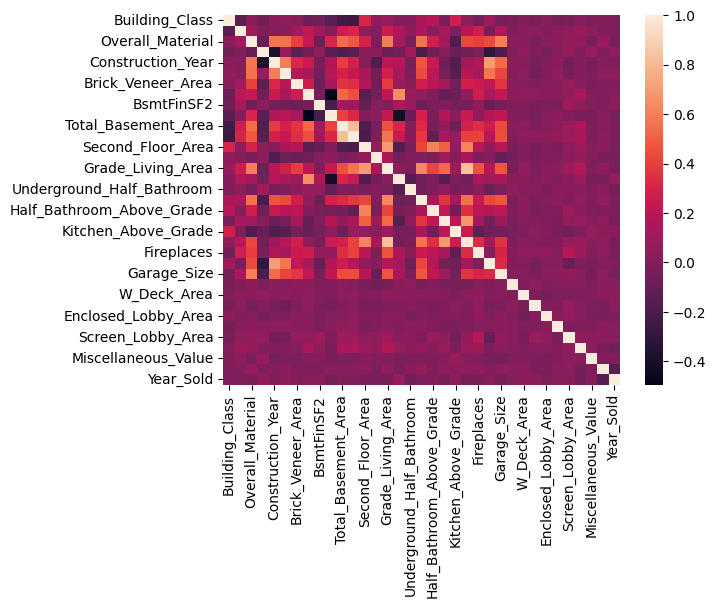

In [86]:
sns.heatmap(correlation_matrix)
plt.show()

In [87]:
threshold = 0.5
mask = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1)

columns_to_drop = set()
for col in mask.columns:
    if mask[col].any():
        columns_to_drop.add(col)

df_filtered = df.drop(columns=columns_to_drop)

In [88]:
columns_to_drop

{'Bedroom_Above_Grade',
 'BsmtFinSF1',
 'Construction_Year',
 'First_Floor_Area',
 'Full_Bathroom_Above_Grade',
 'Garage_Built_Year',
 'Garage_Size',
 'Grade_Living_Area',
 'Half_Bathroom_Above_Grade',
 'Overall_Material',
 'Remodel_Year',
 'Rooms_Above_Grade',
 'Second_Floor_Area',
 'Total_Basement_Area',
 'Underground_Full_Bathroom'}

In [89]:
df_filtered

,Building_Class,Zoning_Class,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,8450,Paved,Reg,Lvl,AllPub,I,GS,CollgCr,...,20.337934,0,0,0,0,2,2008,WD,Normal,208500
1,20,RLD,9600,Paved,Reg,Lvl,AllPub,FR2P,GS,Veenker,...,15.039392,0,0,0,0,5,2007,WD,Normal,181500
2,60,RLD,11250,Paved,IR1,Lvl,AllPub,I,GS,CollgCr,...,-46.232198,0,0,0,0,9,2008,WD,Normal,223500
3,70,RLD,9550,Paved,IR1,Lvl,AllPub,C,GS,Crawfor,...,60.921821,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RLD,14260,Paved,IR1,Lvl,AllPub,FR2P,GS,NoRidge,...,21.788818,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FVR,7500,Paved,Reg,Lvl,AllPub,I,GS,Somerst,...,126.676547,0,0,0,0,10,2009,WD,Normal,185000
1455,60,RLD,7917,Paved,Reg,Lvl,AllPub,I,GS,Gilbert,...,125.521880,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RLD,13175,Paved,Reg,Lvl,AllPub,I,GS,NWAmes,...,148.266666,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RLD,9042,Paved,Reg,Lvl,AllPub,I,GS,Crawfor,...,54.320896,0,0,0,2500,5,2010,WD,Normal,266500


In [90]:
new_df.shape

(1459, 67)

In [91]:
columns_to_be_kept

['Building_Class',
 'Lot_Size',
 'Brick_Veneer_Area',
 'BsmtFinSF2',
 'LowQualFinSF',
 'Underground_Full_Bathroom',
 'Underground_Half_Bathroom',
 'Half_Bathroom_Above_Grade',
 'Fireplaces',
 'W_Deck_Area',
 'Open_Lobby_Area',
 'Enclosed_Lobby_Area',
 'Three_Season_Lobby_Area',
 'Screen_Lobby_Area',
 'Pool_Area',
 'Miscellaneous_Value']

In [92]:
new_df[columns_to_be_kept]

,Building_Class,Lot_Size,Brick_Veneer_Area,BsmtFinSF2,LowQualFinSF,Underground_Full_Bathroom,Underground_Half_Bathroom,Half_Bathroom_Above_Grade,Fireplaces,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value
0,60,8450,196.0,0,0,1,0,1,0,163.788080,69.596115,20.337934,0,0,0,0
1,20,9600,0.0,0,0,0,1,0,1,198.900074,74.716033,15.039392,0,0,0,0
2,60,11250,162.0,0,0,1,0,1,1,26.127533,32.085268,-46.232198,0,0,0,0
3,70,9550,0.0,0,0,1,0,0,1,46.948018,40.181415,60.921821,0,0,0,0
4,60,14260,350.0,0,0,1,0,1,1,-10.626105,20.755323,21.788818,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,7500,0.0,0,0,1,0,0,0,-9.973961,-9.267967,126.676547,0,0,0,0
1455,60,7917,0.0,0,0,0,0,1,1,-80.348891,113.043436,125.521880,0,0,0,0
1456,20,13175,119.0,163,0,1,0,0,2,36.180338,221.514480,148.266666,0,0,0,0
1457,70,9042,0.0,0,0,0,0,0,2,88.568242,110.888690,54.320896,0,0,0,2500


In [93]:
new_df.head()

,Building_Class,Zoning_Class,Lot_Size,Property_Shape,Land_Outline,Lot_Configuration,Neighborhood,Condition1,House_Type,House_Design,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,8450,Reg,Lvl,I,CollgCr,Norm,1Fam,2Story,...,20.337934,0,0,0,0,2,2008,WD,Normal,208500
1,20,RLD,9600,Reg,Lvl,FR2P,Veenker,Feedr,1Fam,1Story,...,15.039392,0,0,0,0,5,2007,WD,Normal,181500
2,60,RLD,11250,IR1,Lvl,I,CollgCr,Norm,1Fam,2Story,...,-46.232198,0,0,0,0,9,2008,WD,Normal,223500
3,70,RLD,9550,IR1,Lvl,C,Crawfor,Norm,1Fam,2Story,...,60.921821,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RLD,14260,IR1,Lvl,FR2P,NoRidge,Norm,1Fam,2Story,...,21.788818,0,0,0,0,12,2008,WD,Normal,250000


In [94]:
columns_to_remove

['Overall_Material',
 'House_Condition',
 'Construction_Year',
 'Remodel_Year',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'Total_Basement_Area',
 'First_Floor_Area',
 'Second_Floor_Area',
 'Grade_Living_Area',
 'Full_Bathroom_Above_Grade',
 'Bedroom_Above_Grade',
 'Kitchen_Above_Grade',
 'Rooms_Above_Grade',
 'Garage_Built_Year',
 'Garage_Size',
 'Garage_Area',
 'Month_Sold',
 'Year_Sold']

In [95]:
new_df.drop(columns=columns_to_remove)

,Building_Class,Zoning_Class,Lot_Size,Property_Shape,Land_Outline,Lot_Configuration,Neighborhood,Condition1,House_Type,House_Design,...,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,8450,Reg,Lvl,I,CollgCr,Norm,1Fam,2Story,...,163.788080,69.596115,20.337934,0,0,0,0,WD,Normal,208500
1,20,RLD,9600,Reg,Lvl,FR2P,Veenker,Feedr,1Fam,1Story,...,198.900074,74.716033,15.039392,0,0,0,0,WD,Normal,181500
2,60,RLD,11250,IR1,Lvl,I,CollgCr,Norm,1Fam,2Story,...,26.127533,32.085268,-46.232198,0,0,0,0,WD,Normal,223500
3,70,RLD,9550,IR1,Lvl,C,Crawfor,Norm,1Fam,2Story,...,46.948018,40.181415,60.921821,0,0,0,0,WD,Abnorml,140000
4,60,RLD,14260,IR1,Lvl,FR2P,NoRidge,Norm,1Fam,2Story,...,-10.626105,20.755323,21.788818,0,0,0,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FVR,7500,Reg,Lvl,I,Somerst,Norm,1Fam,1Story,...,-9.973961,-9.267967,126.676547,0,0,0,0,WD,Normal,185000
1455,60,RLD,7917,Reg,Lvl,I,Gilbert,Norm,1Fam,2Story,...,-80.348891,113.043436,125.521880,0,0,0,0,WD,Normal,175000
1456,20,RLD,13175,Reg,Lvl,I,NWAmes,Norm,1Fam,1Story,...,36.180338,221.514480,148.266666,0,0,0,0,WD,Normal,210000
1457,70,RLD,9042,Reg,Lvl,I,Crawfor,Norm,1Fam,2Story,...,88.568242,110.888690,54.320896,0,0,0,2500,WD,Normal,266500


In [96]:
new_df.shape

(1459, 67)

In [97]:
ll = df[columns_to_be_kept]

In [98]:
ll["Sale_Price"] = new_df["Sale_Price"]

C:\Users\kumar\AppData\Local\Temp\ipykernel_24672\2298138157.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
ll

,Building_Class,Lot_Size,Brick_Veneer_Area,BsmtFinSF2,LowQualFinSF,Underground_Full_Bathroom,Underground_Half_Bathroom,Half_Bathroom_Above_Grade,Fireplaces,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Sale_Price
0,60,8450,196.0,0,0,1,0,1,0,163.788080,69.596115,20.337934,0,0,0,0,208500
1,20,9600,0.0,0,0,0,1,0,1,198.900074,74.716033,15.039392,0,0,0,0,181500
2,60,11250,162.0,0,0,1,0,1,1,26.127533,32.085268,-46.232198,0,0,0,0,223500
3,70,9550,0.0,0,0,1,0,0,1,46.948018,40.181415,60.921821,0,0,0,0,140000
4,60,14260,350.0,0,0,1,0,1,1,-10.626105,20.755323,21.788818,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,7500,0.0,0,0,1,0,0,0,-9.973961,-9.267967,126.676547,0,0,0,0,185000
1455,60,7917,0.0,0,0,0,0,1,1,-80.348891,113.043436,125.521880,0,0,0,0,175000
1456,20,13175,119.0,163,0,1,0,0,2,36.180338,221.514480,148.266666,0,0,0,0,210000
1457,70,9042,0.0,0,0,0,0,0,2,88.568242,110.888690,54.320896,0,0,0,2500,266500


In [100]:
co_matrix = ll.corr()

In [101]:
correlations_with_target = co_matrix['Sale_Price'].drop('Sale_Price')

In [102]:
correlations_with_target

Building_Class              -0.084563
Lot_Size                     0.263843
Brick_Veneer_Area            0.475160
BsmtFinSF2                  -0.010952
LowQualFinSF                -0.025642
Underground_Full_Bathroom    0.227551
Underground_Half_Bathroom   -0.016915
Half_Bathroom_Above_Grade    0.284626
Fireplaces                   0.466828
W_Deck_Area                  0.042814
Open_Lobby_Area             -0.010131
Enclosed_Lobby_Area          0.020789
Three_Season_Lobby_Area      0.044553
Screen_Lobby_Area            0.111378
Pool_Area                    0.092389
Miscellaneous_Value         -0.021216
Name: Sale_Price, dtype: float64

In [103]:
correlation_threshold = 0.3
features_to_keep = correlations_with_target[abs(correlations_with_target) > correlation_threshold].index.tolist()

In [104]:
features_to_keep

['Brick_Veneer_Area', 'Fireplaces']

In [105]:
categorical_columns

Index(['Zoning_Class', 'Road_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Exterior_Material',
       'Exterior_Condition', 'Foundation_Type', 'Basement_Height',
       'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2',
       'Heating_Type', 'Heating_Quality', 'Air_Conditioning',
       'Electrical_System', 'Kitchen_Quality', 'Functional_Rate', 'Garage',
       'Garage_Finish_Year', 'Garage_Quality', 'Garage_Condition',
       'Pavedd_Drive', 'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [106]:
cat_columns = new_df.select_dtypes(include="object").columns.tolist()

In [107]:
from scipy.stats import f_oneway
anova_results = {}
for feature in new_df[cat_columns].columns:  # Exclude the target column
    categories = new_df[feature].unique()
    groups = [new_df[new_df[feature] == category]['Sale_Price'] for category in categories]
    anova_results[feature] = f_oneway(*groups)

# Collect p-values
p_values = {feature: result.pvalue for feature, result in anova_results.items()}

# Select features with p-value below significance threshold (e.g., 0.05)
significance_threshold = 0.05
selected_features = [feature for feature, p_value in p_values.items() if p_value < significance_threshold]

# Display selected features and their p-values
selected_features_pvalues = {feature: p_values[feature] for feature in selected_features}
print("Selected features based on ANOVA p-values:", selected_features_pvalues)

Selected features based on ANOVA p-values: {'Zoning_Class': 8.623678334677968e-35, 'Property_Shape': 7.137696914217586e-25, 'Land_Outline': 2.7817438435761282e-08, 'Lot_Configuration': 3.250291720935249e-06, 'Neighborhood': 2.3465866522923626e-225, 'Condition1': 8.850238347455908e-08, 'House_Type': 2.0291429199969593e-10, 'House_Design': 3.588437772489042e-25, 'Roof_Design': 3.908164572338989e-17, 'Roof_Quality': 7.356309273248755e-08, 'Exterior1st': 2.977413814634284e-43, 'Exterior2nd': 5.494558715253583e-43, 'Exterior_Material': 7.440829120284835e-205, 'Exterior_Condition': 5.068975761586581e-07, 'Foundation_Type': 7.320259470842929e-91, 'Basement_Height': 3.0551393861901977e-194, 'Basement_Condition': 7.225349255486377e-09, 'Exposure_Level': 6.190506171729479e-46, 'BsmtFinType1': 4.371412794979286e-66, 'Heating_Quality': 3.216320938669905e-67, 'Air_Conditioning': 1.7996181382228056e-22, 'Electrical_System': 1.6238358620842179e-18, 'Kitchen_Quality': 4.454356363811786e-192, 'Function

In [108]:
selected_features_pvalues

{'Zoning_Class': 8.623678334677968e-35,
 'Property_Shape': 7.137696914217586e-25,
 'Land_Outline': 2.7817438435761282e-08,
 'Lot_Configuration': 3.250291720935249e-06,
 'Neighborhood': 2.3465866522923626e-225,
 'Condition1': 8.850238347455908e-08,
 'House_Type': 2.0291429199969593e-10,
 'House_Design': 3.588437772489042e-25,
 'Roof_Design': 3.908164572338989e-17,
 'Roof_Quality': 7.356309273248755e-08,
 'Exterior1st': 2.977413814634284e-43,
 'Exterior2nd': 5.494558715253583e-43,
 'Exterior_Material': 7.440829120284835e-205,
 'Exterior_Condition': 5.068975761586581e-07,
 'Foundation_Type': 7.320259470842929e-91,
 'Basement_Height': 3.0551393861901977e-194,
 'Basement_Condition': 7.225349255486377e-09,
 'Exposure_Level': 6.190506171729479e-46,
 'BsmtFinType1': 4.371412794979286e-66,
 'Heating_Quality': 3.216320938669905e-67,
 'Air_Conditioning': 1.7996181382228056e-22,
 'Electrical_System': 1.6238358620842179e-18,
 'Kitchen_Quality': 4.454356363811786e-192,
 'Functional_Rate': 3.77270738

In [109]:
significance_threshold = 0.05
features_to_keep = [feature for feature, p_value in p_values.items() if p_value < significance_threshold]

In [110]:
len(features_to_keep)

31

In [111]:
# means we should keep all the above cat features

In [112]:
new_new_df = new_df.drop(columns=columns_to_remove)

In [113]:
new_new_df.shape

(1459, 48)

In [114]:
len(cat_columns)

31

In [115]:
new_df["Zoning_Class"].unique()

array(['RLD', 'RMD', 'Commer', 'FVR', 'RHD'], dtype=object)

In [116]:
# Ordinal features 
# House_Design, House_Type, Exterior_Material, Exterior_Condition, Basement_Height, Basement_Condition
# Exposure_Level, BsmtFinType1, Heating_Quality, Electrical_System, Kitchen_Quality, Functional_Rate, Garage_Finish_Year
# Garage_Quality, Garage_Condition, Pavedd_Drive, Sale_Condition

In [117]:
new_df["House_Design"].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [118]:
categories = {
    'House_Design': ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl'],
    'House_Type': ['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'],
    'Exterior_Material': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Reversed order
    'Exterior_Condition': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Reversed order
    'Basement_Height': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Reversed order
    'Basement_Condition': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Reversed order
    'Exposure_Level': ['NA', 'No', 'Mn', 'Av', 'Gd'],  # Reversed order
    'BsmtFinType1': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # Reversed order
    'Heating_Quality': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Reversed order
    'Electrical_System': ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],  # Reversed order
    'Kitchen_Quality': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Reversed order
    'Functional_Rate': ['S', 'SD', 'MajD2', 'MajD1', 'MD', "MS", 'MD2', 'MD1', 'TF'],  # Reversed order
    'Garage_Finish_Year': ['NA', 'Unf', 'RFn', 'Fin'],  # Reversed order
    'Garage_Quality': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Reversed order
    'Garage_Condition': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Reversed order
    'Pavedd_Drive': ['N', 'P', 'Y'],  # Reversed order
    'Sale_Condition': ['Partial', 'Family', 'Alloca', 'AdjLand', 'Abnorml', 'Normal']  # Reversed order
}

In [119]:
categories.keys()

dict_keys(['House_Design', 'House_Type', 'Exterior_Material', 'Exterior_Condition', 'Basement_Height', 'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'Heating_Quality', 'Electrical_System', 'Kitchen_Quality', 'Functional_Rate', 'Garage_Finish_Year', 'Garage_Quality', 'Garage_Condition', 'Pavedd_Drive', 'Sale_Condition'])

In [120]:
columns_to_encode = ['House_Design', 'House_Type', 'Exterior_Material', 'Exterior_Condition', 'Basement_Height', 
                     'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'Heating_Quality', 'Electrical_System', 'Kitchen_Quality', 
                     'Functional_Rate', 'Garage_Finish_Year', 'Garage_Quality', 'Garage_Condition', 'Pavedd_Drive', 'Sale_Condition']

In [121]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[categories['House_Design'], categories['House_Type'],
                                      categories['Exterior_Material'], categories['Exterior_Condition'],
                                      categories['Basement_Height'], categories['Basement_Condition'],
                                      categories['Exposure_Level'], categories['BsmtFinType1'],
                                      categories['Heating_Quality'], categories['Electrical_System'],
                                      categories['Kitchen_Quality'], categories['Functional_Rate'],
                                      categories['Garage_Finish_Year'], categories['Garage_Quality'],
                                      categories['Garage_Condition'], categories['Pavedd_Drive'],
                                      categories['Sale_Condition']])

encoded_columns = encoder.fit_transform(new_new_df[columns_to_encode])
encoded_df = pd.DataFrame(encoded_columns, columns=columns_to_encode)

df[columns_to_encode] = encoded_df

df_encoded = pd.concat([new_new_df.drop(columns=columns_to_encode), encoded_df], axis=1)

print(encoded_df)

      House_Design  House_Type  Exterior_Material  Exterior_Condition  \
0              3.0         0.0                3.0                 2.0   
1              0.0         0.0                2.0                 2.0   
2              3.0         0.0                3.0                 2.0   
3              3.0         0.0                2.0                 2.0   
4              3.0         0.0                3.0                 2.0   
...            ...         ...                ...                 ...   
1454           0.0         0.0                3.0                 2.0   
1455           3.0         0.0                2.0                 2.0   
1456           0.0         0.0                2.0                 2.0   
1457           3.0         0.0                4.0                 3.0   
1458           0.0         0.0                2.0                 2.0   

      Basement_Height  Basement_Condition  Exposure_Level  BsmtFinType1  \
0                 4.0                 3.0       

In [122]:
new_new_df.head()

,Building_Class,Zoning_Class,Lot_Size,Property_Shape,Land_Outline,Lot_Configuration,Neighborhood,Condition1,House_Type,House_Design,...,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,8450,Reg,Lvl,I,CollgCr,Norm,1Fam,2Story,...,163.788080,69.596115,20.337934,0,0,0,0,WD,Normal,208500
1,20,RLD,9600,Reg,Lvl,FR2P,Veenker,Feedr,1Fam,1Story,...,198.900074,74.716033,15.039392,0,0,0,0,WD,Normal,181500
2,60,RLD,11250,IR1,Lvl,I,CollgCr,Norm,1Fam,2Story,...,26.127533,32.085268,-46.232198,0,0,0,0,WD,Normal,223500
3,70,RLD,9550,IR1,Lvl,C,Crawfor,Norm,1Fam,2Story,...,46.948018,40.181415,60.921821,0,0,0,0,WD,Abnorml,140000
4,60,RLD,14260,IR1,Lvl,FR2P,NoRidge,Norm,1Fam,2Story,...,-10.626105,20.755323,21.788818,0,0,0,0,WD,Normal,250000


In [123]:
#new_new_df.to_csv("file_after_feature_selection.csv", index=False)

In [124]:
new_new_df

,Building_Class,Zoning_Class,Lot_Size,Property_Shape,Land_Outline,Lot_Configuration,Neighborhood,Condition1,House_Type,House_Design,...,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,8450,Reg,Lvl,I,CollgCr,Norm,1Fam,2Story,...,163.788080,69.596115,20.337934,0,0,0,0,WD,Normal,208500
1,20,RLD,9600,Reg,Lvl,FR2P,Veenker,Feedr,1Fam,1Story,...,198.900074,74.716033,15.039392,0,0,0,0,WD,Normal,181500
2,60,RLD,11250,IR1,Lvl,I,CollgCr,Norm,1Fam,2Story,...,26.127533,32.085268,-46.232198,0,0,0,0,WD,Normal,223500
3,70,RLD,9550,IR1,Lvl,C,Crawfor,Norm,1Fam,2Story,...,46.948018,40.181415,60.921821,0,0,0,0,WD,Abnorml,140000
4,60,RLD,14260,IR1,Lvl,FR2P,NoRidge,Norm,1Fam,2Story,...,-10.626105,20.755323,21.788818,0,0,0,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FVR,7500,Reg,Lvl,I,Somerst,Norm,1Fam,1Story,...,-9.973961,-9.267967,126.676547,0,0,0,0,WD,Normal,185000
1455,60,RLD,7917,Reg,Lvl,I,Gilbert,Norm,1Fam,2Story,...,-80.348891,113.043436,125.521880,0,0,0,0,WD,Normal,175000
1456,20,RLD,13175,Reg,Lvl,I,NWAmes,Norm,1Fam,1Story,...,36.180338,221.514480,148.266666,0,0,0,0,WD,Normal,210000
1457,70,RLD,9042,Reg,Lvl,I,Crawfor,Norm,1Fam,2Story,...,88.568242,110.888690,54.320896,0,0,0,2500,WD,Normal,266500


#### After performing feature selection, the data shape is now 1459 rows × 48 columns. The removed columns included those identified by ANOVA and correlation tests, such as 'Overall_Material', 'House_Condition', and 'Garage_Size', among others, as well as categorical features like 'Road_Type', 'Utility_Type', and 'Heating_Type'.

In [125]:
new_new_df.select_dtypes(include=["float", "int"]).columns

Index(['Building_Class', 'Lot_Size', 'Brick_Veneer_Area', 'BsmtFinSF2',
       'LowQualFinSF', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Half_Bathroom_Above_Grade', 'Fireplaces',
       'W_Deck_Area', 'Open_Lobby_Area', 'Enclosed_Lobby_Area',
       'Three_Season_Lobby_Area', 'Screen_Lobby_Area', 'Pool_Area',
       'Miscellaneous_Value', 'Sale_Price'],
      dtype='object')

In [126]:
columns_to_normalize = ['Building_Class', 'Lot_Size', 'Brick_Veneer_Area', 'BsmtFinSF2',
       'LowQualFinSF', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Half_Bathroom_Above_Grade', 'Fireplaces',
       'W_Deck_Area', 'Open_Lobby_Area', 'Enclosed_Lobby_Area',
       'Three_Season_Lobby_Area', 'Screen_Lobby_Area', 'Pool_Area',
       'Miscellaneous_Value', 'Sale_Price']

In [127]:
nominal_features = ["Zoning_Class", "Property_Shape", "Land_Outline", "Lot_Configuration", "Neighborhood", "Condition1",
                    "Roof_Design", "Roof_Quality", "Exterior1st", "Exterior2nd", "Foundation_Type", "Garage", "Sale_Type"]

In [128]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(new_new_df[nominal_features])

encoded_df1 = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(nominal_features))

df_encoded = pd.concat([df_encoded.drop(columns=nominal_features), encoded_df1], axis=1)

In [129]:
df_encoded.shape

(1459, 141)

In [130]:
encoded_df1.shape

(1459, 106)

In [131]:
df_encoded

,Building_Class,Lot_Size,Brick_Veneer_Area,BsmtFinSF2,Air_Conditioning,LowQualFinSF,Underground_Full_Bathroom,Underground_Half_Bathroom,Half_Bathroom_Above_Grade,Fireplaces,...,Garage_CarPort,Garage_Detchd,Sale_Type_CWD,Sale_Type_Con,Sale_Type_ConLD,Sale_Type_ConLI,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_WD
0,60,8450,196.0,0,Y,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,20,9600,0.0,0,Y,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,60,11250,162.0,0,Y,0,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,70,9550,0.0,0,Y,0,1,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,60,14260,350.0,0,Y,0,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,7500,0.0,0,Y,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1455,60,7917,0.0,0,Y,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1456,20,13175,119.0,163,Y,0,1,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,70,9042,0.0,0,Y,0,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [132]:
new_new_df.shape

(1459, 48)

In [133]:
mapping_air_conditioning = {'Y': 1, 'N': 0}

df_encoded['Air_Conditioning_Binary'] = df_encoded['Air_Conditioning'].map(mapping_air_conditioning)

df_encoded = df_encoded.drop(columns=['Air_Conditioning'])

In [134]:
df_encoded

,Building_Class,Lot_Size,Brick_Veneer_Area,BsmtFinSF2,LowQualFinSF,Underground_Full_Bathroom,Underground_Half_Bathroom,Half_Bathroom_Above_Grade,Fireplaces,W_Deck_Area,...,Garage_Detchd,Sale_Type_CWD,Sale_Type_Con,Sale_Type_ConLD,Sale_Type_ConLI,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_WD,Air_Conditioning_Binary
0,60,8450,196.0,0,0,1,0,1,0,163.788080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,20,9600,0.0,0,0,0,1,0,1,198.900074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,60,11250,162.0,0,0,1,0,1,1,26.127533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,70,9550,0.0,0,0,1,0,0,1,46.948018,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,60,14260,350.0,0,0,1,0,1,1,-10.626105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,7500,0.0,0,0,1,0,0,0,-9.973961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1455,60,7917,0.0,0,0,0,0,1,1,-80.348891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1456,20,13175,119.0,163,0,1,0,0,2,36.180338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1457,70,9042,0.0,0,0,0,0,0,2,88.568242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [135]:
columns_to_normalize

['Building_Class',
 'Lot_Size',
 'Brick_Veneer_Area',
 'BsmtFinSF2',
 'LowQualFinSF',
 'Underground_Full_Bathroom',
 'Underground_Half_Bathroom',
 'Half_Bathroom_Above_Grade',
 'Fireplaces',
 'W_Deck_Area',
 'Open_Lobby_Area',
 'Enclosed_Lobby_Area',
 'Three_Season_Lobby_Area',
 'Screen_Lobby_Area',
 'Pool_Area',
 'Miscellaneous_Value',
 'Sale_Price']

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [137]:
df_encoded[columns_to_normalize] = scaler.fit_transform(df_encoded[columns_to_normalize])

In [138]:
df_encoded

,Building_Class,Lot_Size,Brick_Veneer_Area,BsmtFinSF2,LowQualFinSF,Underground_Full_Bathroom,Underground_Half_Bathroom,Half_Bathroom_Above_Grade,Fireplaces,W_Deck_Area,...,Garage_Detchd,Sale_Type_CWD,Sale_Type_Con,Sale_Type_ConLD,Sale_Type_ConLI,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_WD,Air_Conditioning_Binary
0,0.072771,-0.207111,0.510905,-0.287744,-0.120284,1.108656,-0.241148,1.228641,-0.951848,0.567296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,-0.873090,-0.091895,-0.574674,-0.287744,-0.120284,-0.819269,3.947370,-0.760912,0.599824,0.848746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,0.072771,0.073415,0.322590,-0.287744,-0.120284,1.108656,-0.241148,1.228641,0.599824,-0.536161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0.309236,-0.096904,-0.574674,-0.287744,-0.120284,1.108656,-0.241148,-0.760912,0.599824,-0.369268,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0.072771,0.374980,1.363861,-0.287744,-0.120284,1.108656,-0.241148,1.228641,0.599824,-0.830770,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.873090,-0.302289,-0.574674,-0.287744,-0.120284,1.108656,-0.241148,-0.760912,-0.951848,-0.825542,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1455,0.072771,-0.260511,-0.574674,-0.287744,-0.120284,-0.819269,-0.241148,1.228641,0.599824,-1.389652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1456,-0.873090,0.266277,0.084428,0.723464,-0.120284,1.108656,-0.241148,-0.760912,2.151495,-0.455580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1457,0.309236,-0.147800,-0.574674,-0.287744,-0.120284,-0.819269,-0.241148,-0.760912,2.151495,-0.035650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


#### After feature selection, I transformed the columns using appropriate encoding techniques: OneHotEncoding for categorical features, binary mapping for binary features, and ordinal encoding for ordinal features.

In [139]:
X = df_encoded.drop(columns="Sale_Price")
y = df_encoded["Sale_Price"]

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [144]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [145]:
y_pred = lr.predict(X_test)

In [146]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score: ", np.mean(r2_score(y_test, y_pred))*100)
print("MSE: ", mean_squared_error(y_test, y_pred))

R2 score:  69.42975456152712
MSE:  0.2469884707847605


#### After applying linear regression on the transformed data, the R² score improved to 69%, which is better than the previous score.

In [147]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neural_network import MLPRegressor

models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'k-NN': KNeighborsRegressor(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Neural Network': MLPRegressor(max_iter=1000)
}

In [148]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R²': r2}

# Print results
for name, metrics in results.items():
    print(f'{name} - MSE: {metrics["MSE"]:.4f}, R²: {metrics["R²"]:.4f}')

Decision Tree - MSE: 0.2806, R²: 0.6527
Random Forest - MSE: 0.1429, R²: 0.8231
Gradient Boosting - MSE: 0.1372, R²: 0.8302
SVR - MSE: 0.1263, R²: 0.8437
k-NN - MSE: 0.1887, R²: 0.7665
Ridge - MSE: 0.1674, R²: 0.7928
Lasso - MSE: 0.8123, R²: -0.0055
ElasticNet - MSE: 0.7845, R²: 0.0290
Neural Network - MSE: 0.2134, R²: 0.7358


In [149]:
import xgboost as xgb

xgb = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [150]:
y_pred2 = xgb.predict(X_test)

# Evaluate the model
mse2 = mean_squared_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)

print("R2 score: ", r22)
print("MSE: ", mse2)

R2 score:  0.8062251458983503
MSE:  0.15655796741125982


## Before Transformation (High Feature Dimensionality - 1459 features):

- Decision Tree (DT): High MSE (1.34 billion) and moderate R² (0.72) indicate a poor fit. The large number of features might be causing overfitting.
- Random Forest (RF): Lower MSE (494 million) and high R² (0.89) suggest a better fit than DT. However, there's still room for improvement.
- Gradient Boosting (GB): Even lower MSE (412 million) and a very high R² (0.91) show the best fit among tree-based models before transformation.
- Support Vector Regression (SVR): Very high MSE (513 billion) and negative R² indicate a complete failure to capture the relationship. This model likely doesn't suit this data.
- k-Nearest Neighbors (k-NN): Moderate MSE (820 million) and R² (0.83) suggest a decent fit, but there's potential for improvement.
- Ridge, Lasso, ElasticNet: These regularization models show moderate MSEs (around 500 million) and R²s (around 0.89), indicating a trade-off between underfitting and overfitting due to regularization.
- Neural Network (NN): Very high MSE (610 billion) and negative R² imply a complete failure to learn from the data. The high dimensionality might be overwhelming the network.
- XGBoost: Similar performance to Gradient Boosting with slightly lower MSE and slightly higher R².

## After Transformation (Reduced Feature Dimensionality - 48 features):

### All Models: A significant decrease in MSE (all below 1) and a general increase in R² suggest a much better fit for all models. The data transformation likely addressed the issue of high dimensionality.
- DT, RF, GB, k-NN: These models show substantial improvements with much lower MSEs and higher R²s, indicating the benefit of dimensionality reduction for tree-based and nearest neighbor methods.
- SVR: Still shows a high MSE, although lower than before. This suggests SVR might not be suitable for this data even after transformation.
- Ridge, Lasso: Both models show a significant increase in MSE and a negative R². This indicates overfitting due to the regularization being too strong for the lower dimensional data. We might need to adjust the regularization parameters.
- ElasticNet: Similar to Ridge and Lasso, it also suffers from overfitting with high MSE and negative R².
- NN: Shows improvement with lower MSE and positive R², but still performs worse than other models. The reduced dimensionality might have helped, but the network architecture might still need adjustments.
- XGBoost: Maintains a good balance with a low MSE and a high R², suggesting it benefits from the reduced dimensionality while avoiding overfitting.

## Best Performer:

### Based on the scores after data transformation, Gradient Boosting and XGBoost are the clear winners with the lowest MSEs and highest R²s. They seem to be most effective in capturing the underlying relationships after dimensionality reduction. Here's a breakdown:

- Gradient Boosting & XGBoost (MSE: 0.1372 & 0.1565, R²: 0.8302 & 0.806): These models perform very similarly, making it difficult to definitively choose one. You might need to perform further hyperparameter tuning or compare them on a hold-out validation set to determine the absolute best.
- Random Forest (MSE: 0.1429, R²: 0.8231): A close contender, performing slightly worse than the top two.
- k-NN & SVR (MSE: 0.1887 & 0.1263, R²: 0.7665 & 0.8437): These models show decent performance, but fall behind the top performers. SVR's high R² might be misleading due to its overall high MSE.
- Other Models (Ridge, Lasso, ElasticNet, Neural Network): These models suffered from overfitting after dimensionality reduction and require further adjustments.

# More Exploratory Data Analysis on the clean Data

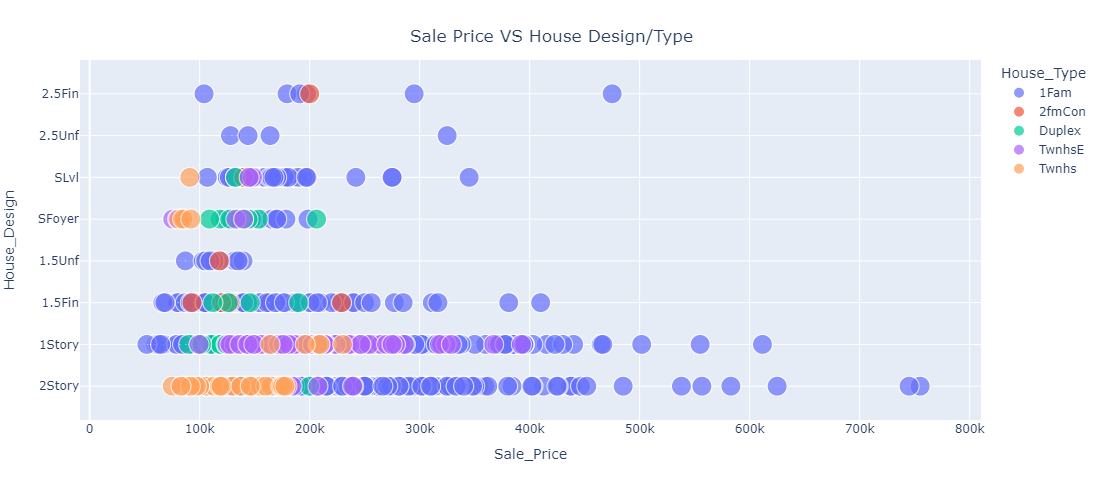

In [151]:
fig = px.scatter(new_new_df, x = "Sale_Price", y = "House_Design", color="House_Type", size=df_encoded["Air_Conditioning_Binary"], width=1000, height=500)
fig.update_layout(title="Sale Price VS House Design/Type", title_x=0.5, title_y=0.94)
fig.show()

- It shows that single-family homes (1Fam) dominate the market and that 2.5Fin houses tend to have higher prices, while 2Story and 1Story houses are more common in the lower to mid-price ranges.

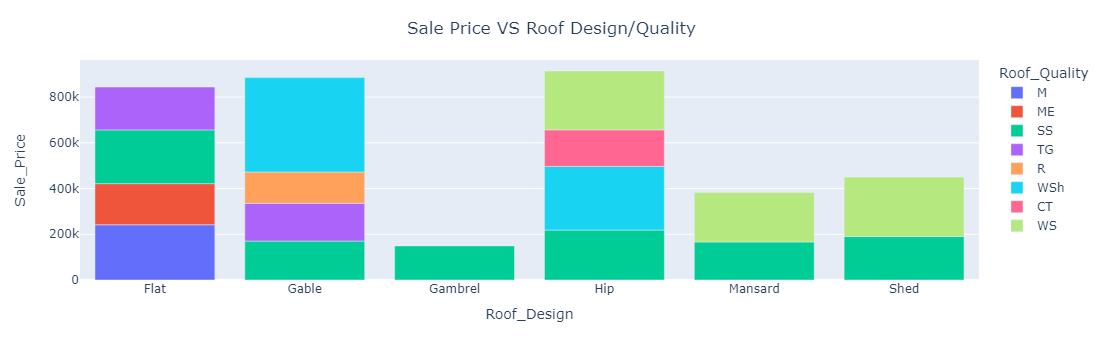

In [152]:
aggregated_data = new_new_df.groupby(['Roof_Design', "Roof_Quality"])['Sale_Price'].mean().reset_index()

fig = px.bar(aggregated_data, x='Roof_Design', y='Sale_Price', color="Roof_Quality")
fig.update_layout(title="Sale Price VS Roof Design/Quality", title_x=0.5, title_y=0.94)
fig.show()

- from above graph gabled roof tends to be the most expensive design, with an average sale price of around $137k. Homes with a flat roof or a hip roof tend to be the least expensive on average.

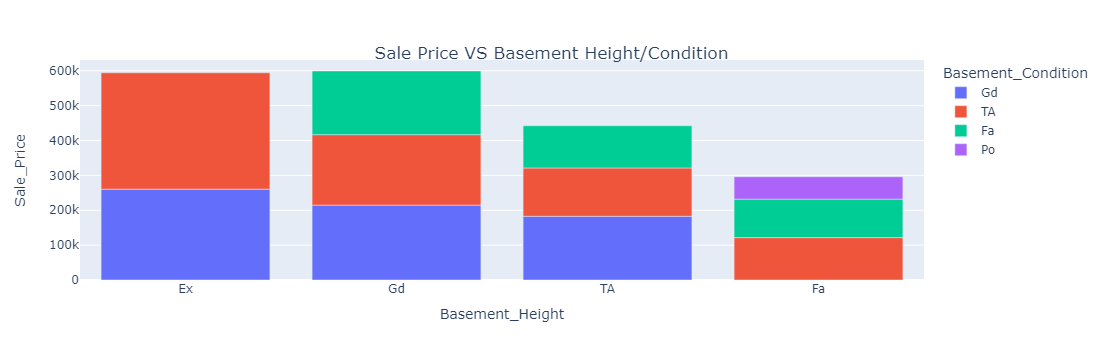

In [153]:
aggregated_data = new_new_df.groupby(['Basement_Height', 'Basement_Condition'])['Sale_Price'].mean().reset_index()

fig = px.bar(aggregated_data, x='Basement_Height', y='Sale_Price', color="Basement_Condition")
fig.update_layout(title="Sale Price VS Basement Height/Condition", title_x=0.5, title_y=0.87)
fig.show()

- There are houses with high basements (presumably rated Excellent or Good) that sold for a lower price than houses with shorter basements (possibly rated Fair or Poor).
- Similarly, there are houses with Poor or Fair condition basements that sold for a higher price than those with Excellent or Good condition basements.

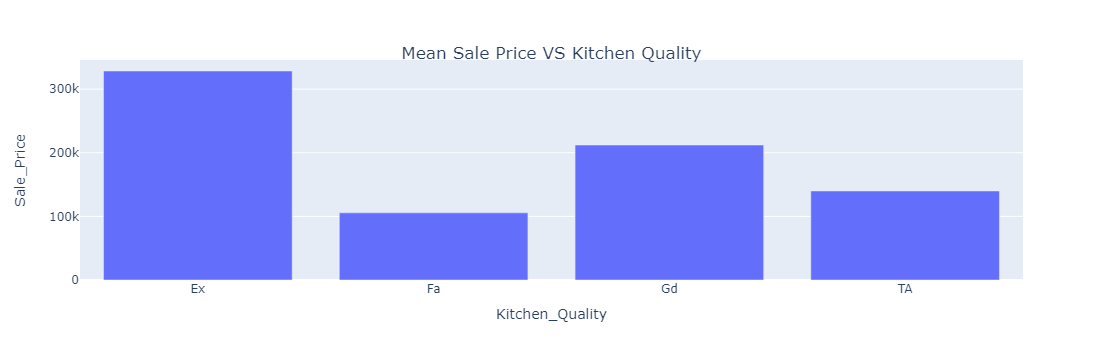

In [154]:
aggregated_data = new_new_df.groupby(["Kitchen_Quality"])['Sale_Price'].mean().reset_index()

fig = px.bar(aggregated_data, x='Kitchen_Quality', y='Sale_Price')
fig.update_layout(title="Mean Sale Price VS Kitchen Quality", title_x=0.5, title_y=0.87)
fig.show()

- graph you sent shows a trend where the average sale price is relatively low for kitchens rated Good while Excellent kitchens have a higher average sale price.
- Time: The data may not account for the age of the kitchens. An Excellent kitchen might be a recent renovation, while a Good kitchen might be older.

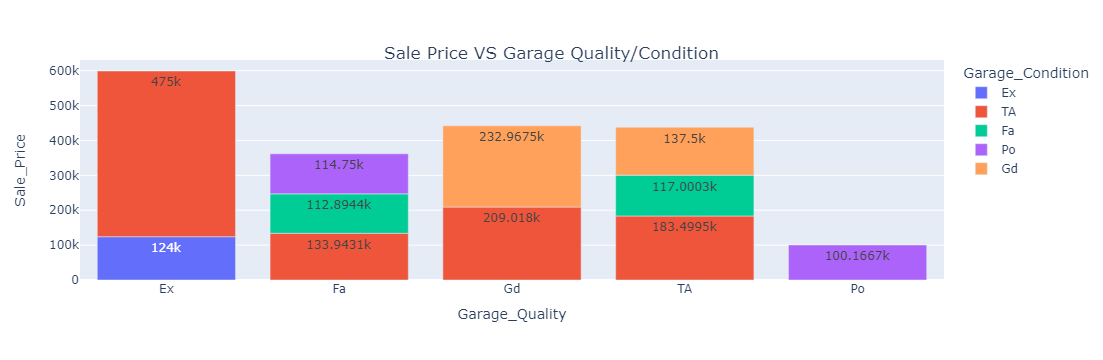

In [155]:
aggregated_data = new_new_df.groupby(['Garage_Quality', 'Garage_Condition'])['Sale_Price'].mean().reset_index()

fig = px.bar(aggregated_data, x='Garage_Quality', y='Sale_Price', color="Garage_Condition", text_auto=True)
fig.update_layout(title="Sale Price VS Garage Quality/Condition", title_x=0.5, title_y=0.87)
fig.show()

- There is a positive correlation between sale price and garage condition. This means that houses with garages in better condition tend to sell for more than houses with garages in poorer condition.
- For example, a house with a garage in Excellent condition (Ex) might sell for an average price around 600k, #### whereas a house with a garage in Poor condition (Po) might sell for an average price around
100k.

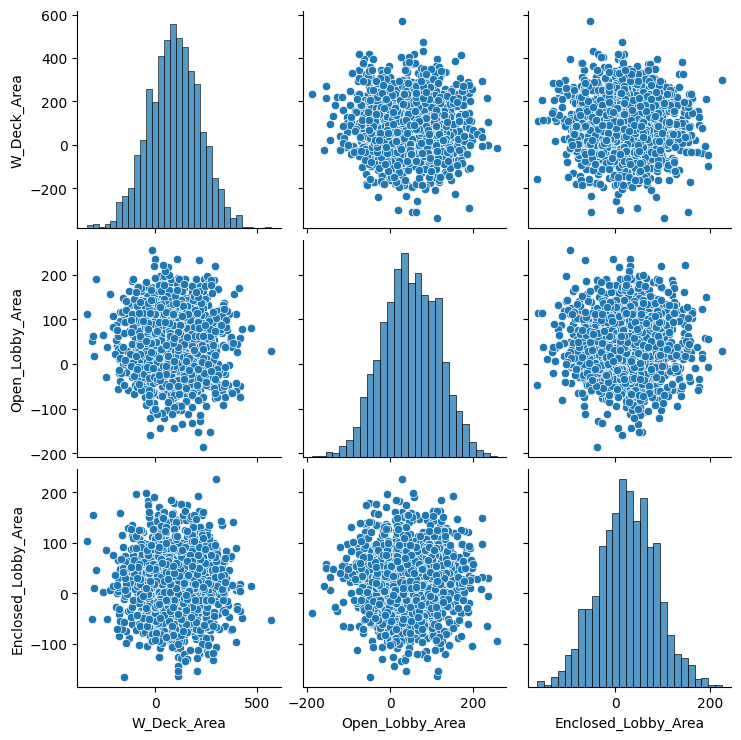

In [156]:
sns.pairplot(new_new_df, vars=["W_Deck_Area", "Open_Lobby_Area", "Enclosed_Lobby_Area"])
plt.show()

In [157]:
new_new_df.columns

Index(['Building_Class', 'Zoning_Class', 'Lot_Size', 'Property_Shape',
       'Land_Outline', 'Lot_Configuration', 'Neighborhood', 'Condition1',
       'House_Type', 'House_Design', 'Roof_Design', 'Roof_Quality',
       'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Area', 'Exterior_Material',
       'Exterior_Condition', 'Foundation_Type', 'Basement_Height',
       'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinSF2',
       'Heating_Quality', 'Air_Conditioning', 'Electrical_System',
       'LowQualFinSF', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Half_Bathroom_Above_Grade',
       'Kitchen_Quality', 'Functional_Rate', 'Fireplaces', 'Garage',
       'Garage_Finish_Year', 'Garage_Quality', 'Garage_Condition',
       'Pavedd_Drive', 'W_Deck_Area', 'Open_Lobby_Area', 'Enclosed_Lobby_Area',
       'Three_Season_Lobby_Area', 'Screen_Lobby_Area', 'Pool_Area',
       'Miscellaneous_Value', 'Sale_Type', 'Sale_Condition', 'Sale_Price'],
      dtype='object'

In [158]:
#df_encoded.to_csv("train.csv", index=False)

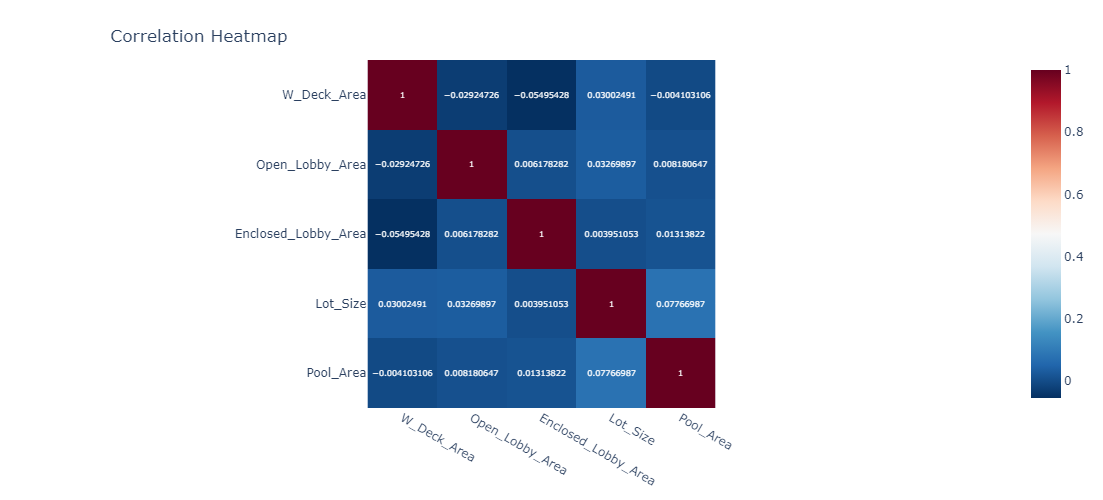

In [159]:
corelation_matrix = new_new_df[["W_Deck_Area", "Open_Lobby_Area", "Enclosed_Lobby_Area", "Lot_Size", "Pool_Area"]].corr()

fig = px.imshow(corelation_matrix, text_auto=True, color_continuous_scale='RdBu_r', width=1000, height=500)
fig.update_layout(title="Correlation Heatmap", title_x=0.1, title_y=0.94)
fig.show()

- There is a positive correlation between Lot_Size and Pool_Area, which means that houses with larger lots tend to also have larger pools.
- There is a negative correlation between Enclosed_Lobby_Area and Open_Lobby_Area, which means that houses with larger enclosed lobbies tend to have smaller open lobbies.

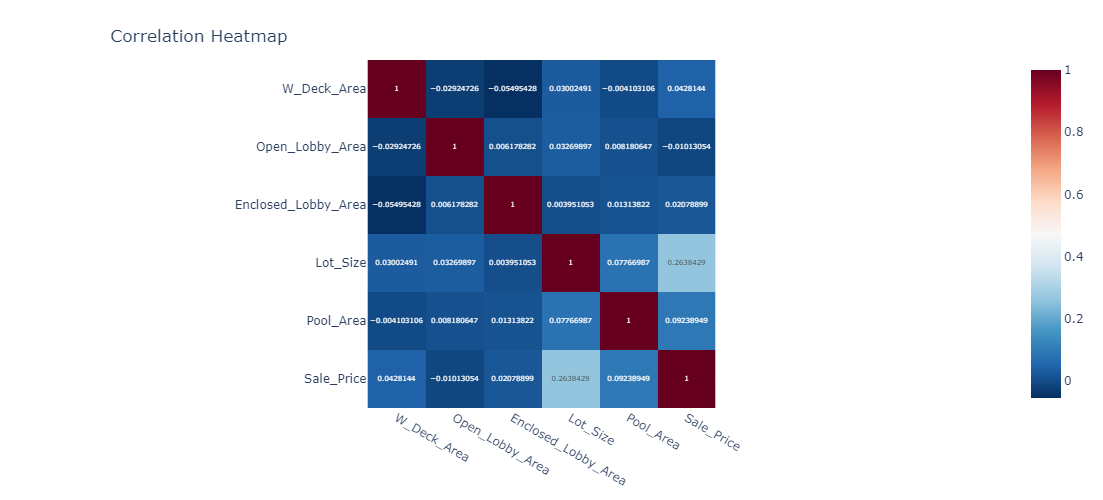

In [161]:
corelation_matrix = new_new_df[["W_Deck_Area", "Open_Lobby_Area", "Enclosed_Lobby_Area", "Lot_Size", "Pool_Area", "Sale_Price"]].corr()

fig = px.imshow(corelation_matrix, text_auto=True, color_continuous_scale='RdBu_r', width=1000, height=500)
fig.update_layout(title="Correlation Heatmap", title_x=0.1, title_y=0.94)
fig.show()

- we can see that there is a strong positive correlation between sale price and lot size. This means that houses with larger lots tend to sell for more money.
- There is also a weak positive correlation between sale price and open lobby area. This means that houses with larger open lobby areas tend to sell for more money
- but the correlation is not as strong as the correlation between sale price and lot size. There is a weak positive correlation between sale price and enclosed lobby area
- There is a negative correlation between sale price and enclosed lobby area. This means that houses with larger enclosed lobby areas tend to sell for less money. However, it's important to note that the correlation is not very strong.

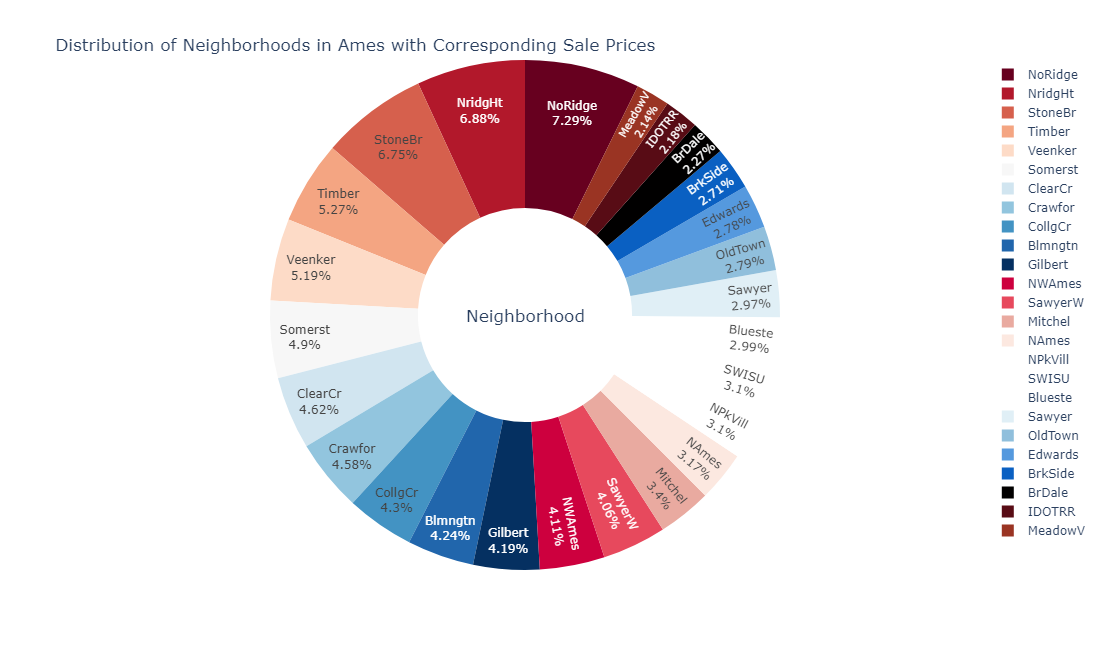

In [163]:
aggregated_data = new_new_df.groupby(['Neighborhood'])['Sale_Price'].mean().reset_index()
fig = px.pie(aggregated_data, values='Sale_Price', names='Neighborhood', hole=.42, color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title="Distribution of Neighborhoods in Ames with Corresponding Sale Prices", title_x=0.05, title_y=0.94, width=1000, height=650,
                 annotations=[dict(text='Neighborhood', x=0.5, y=0.5, font_size=17, showarrow=False)])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## The pie chart represents the percentage distribution of neighborhoods within Ames city limits, along with their respective sale prices. Here’s an analysis of the trends depicted in the chart:
- NoRidge (7.29%) and NridgHt (6.88%) have the highest percentages, indicating that these neighborhoods are the most common or have the highest sales volumes within the dataset.
- StoneBr (6.75%) and Timber (5.27%) also constitute a significant portion of the sales, suggesting that these neighborhoods are also popular or have a high frequency of sales.
- Veenker (5.19%), Somerst (4.9%), ClearCr (4.62%), and Crawfor (4.58%) show notable percentages, reflecting their importance in the housing market.
- Other neighborhoods such as CollgCr, Blmngtn, Gilbert, NWAmes, SawyerW, Mitchel, NPkVill, SWISU, Blueste, and others have varying percentages, with the lower end around 2.7% (BrDale, BrkSide).

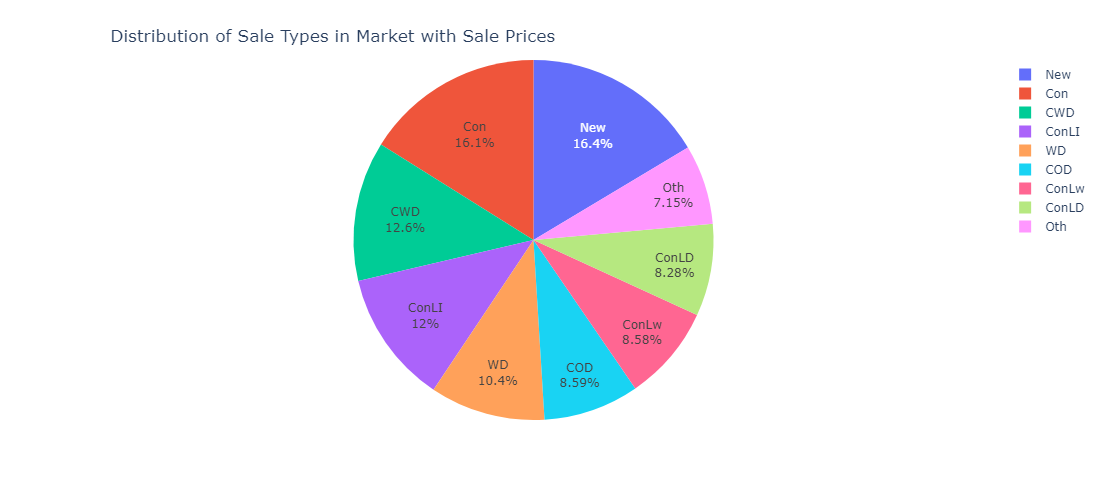

In [164]:
aggregated_data = new_new_df.groupby(['Sale_Type'])['Sale_Price'].mean().reset_index()
fig = px.pie(aggregated_data, values='Sale_Price', names='Sale_Type')
fig.update_layout(title="Distribution of Sale Types in Market with Sale Prices", title_x=0.1, title_y=0.94, width=1000, height=500)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## The pie chart illustrates the distribution of different sale types with their corresponding percentages.
- New (16.4%) and Con (16.1%) have the highest percentage, indicating that newly constructed homes and properties sold through a contract with a 15% down payment on regular terms are the most common sale types.
- CWD (12.6%) and ConLI (12%) also constitute a significant portion of the sales. Cash sales (CWD) and sales through a contract with low interest (ConLI) are popular among buyers.
- WD (10.4%) and COD (8.59%) follow next, showing that conventional warranty deed sales and court officer deed/estate sales are also relatively common.
- ConLw (8.58%) and ConLD (8.28%) have similar proportions, suggesting that sales through contracts with low down payment and low interest or low down payment are also utilized options.
- Oth (7.15%) is the least common, indicating other types of sales are less frequent.

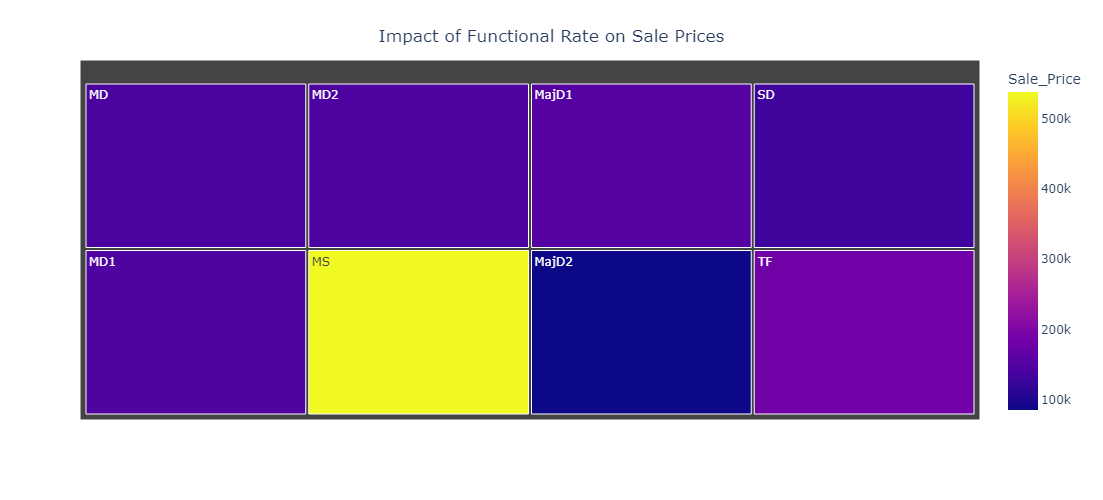

In [166]:
aggregated_data = new_new_df.groupby(['Functional_Rate'])['Sale_Price'].mean().reset_index()
fig = px.treemap(aggregated_data, path = ["Functional_Rate"], color = "Sale_Price")
fig.update_layout(title="Impact of Functional Rate on Sale Prices", title_x=0.5, title_y=0.94, width=1000, height=500)
fig.show()

## The tree map visualizes the distribution of different functional rates of homes along with their sale prices.
- The chart indicates that the condition of the home (functional rate) has a noticeable impact on the sale price. Homes with typical functionality command the highest prices, while those with severe damage or major deductions have the lowest sale prices.